# Tip Problem

Consider the golden rules of tipping which have been built on the experience of customers over the years in American restaurants:

   - if the service is poor or the food is of poor quality, then the tip is small.
   - if the service is good then the tip is average.
   - if the service is excellent or the food is delicious, then the tip is generous.
   
Assume that an average tip is 15% of the bill, a generous tip is 25%, and a small tip is 5%.


In [13]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from skfuzzy import control as ctrl

## Antecedents and Consequents

In [14]:
# inputs (Antecedents): service and food quality
# output (Consequents): tip
service = ctrl.Antecedent(np.linspace(0, 10, 1000), 'service')
food = ctrl.Antecedent(np.linspace(0, 10, 1000), 'food')
tip = ctrl.Consequent(np.linspace(0, 25, 1000), 'tip')

## Membership Functions

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


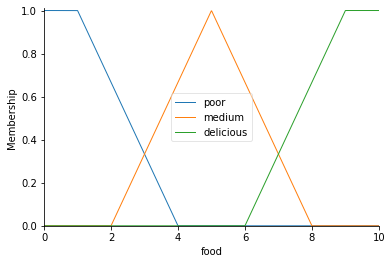

In [15]:
# Membership Functions
food['poor'] = fuzz.trapmf(food.universe, [0, 0, 1, 4])
food['medium'] = fuzz.trimf(food.universe, [2, 5, 8])
food['delicious'] = fuzz.trapmf(food.universe, [6, 9, 10, 10])
food.view()

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


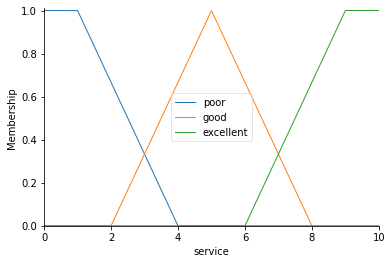

In [16]:
# Membership Functions
service['poor'] = fuzz.trapmf(service.universe, [0, 0, 1, 4])
service['good'] = fuzz.trimf(service.universe, [2, 5, 8])
service['excellent'] = fuzz.trapmf(service.universe, [6, 9, 10, 10])
service.view()

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


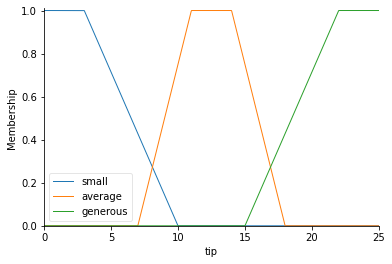

In [17]:
tip['small'] = fuzz.trapmf(tip.universe, [0, 0, 3, 10])
tip['average'] = fuzz.trapmf(tip.universe, [7, 11, 14, 18])
tip['generous'] = fuzz.trapmf(tip.universe, [15, 22, 25, 25])
tip.view()

## Fuzzy Rules

- if the service is poor or the food is of poor quality, then the tip is small.
- if the service is good then the tip is average.
- if the service is excellent or the food is delicious, then the tip is generous.

In [18]:
rule_1 = ctrl.Rule(service['poor'] | food['poor'], tip['small'])
rule_2 = ctrl.Rule(service['good'], tip['average'])
rule_3 = ctrl.Rule(service['excellent'] | food['delicious'], tip['generous'])

In [19]:
tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [20]:
service = np.linspace(0, 10, 100)
food = np.linspace(0, 10, 100)

In [21]:
def fun(X, Y):
    Z = []
    for x in X:
        for y in Y:
            tipping.input['food'] = x
            tipping.input['service'] = y
            tipping.compute()
            Z.append(tipping.output['tip'])
    return Z

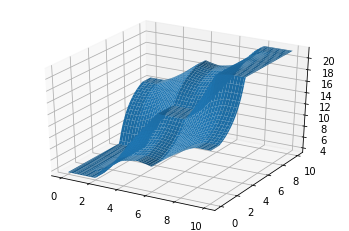

In [22]:
X, Y = np.meshgrid(food, service)
zs = np.array(fun(service, food))
Z = zs.reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)